In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

print(tf.__version__)

D0530 20:54:21.741465150      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0530 20:54:21.741488304      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0530 20:54:21.741492133      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0530 20:54:21.741494677      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0530 20:54:21.741497223      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (default:ON)
D0530 20:54:21.741499653      13 config.cc:196]                        gRPC EXPERIMENT client_privacy                         ON  (default:ON)
D0530 20:54:21.741502163      13 config.cc:196]                        gRPC EXPERIMENT dapper_request_wire_size               OFF (default:O

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1717102476.762843      13 service.cc:145] XLA service 0x5c1d224f0780 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717102476.762890      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1717102476.762894      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1717102476.762897      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1717102476.762900      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1717102476.762902      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1717102476.762905      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1717102476.762907      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1717102476.762910      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of replicas: 8
2.16.1


In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
GCS_PATH = KaggleDatasets().get_gcs_path('chest-xray-pneumonia')
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
IMAGE_SIZE = [180, 180]
EPOCHS = 25

get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/chest-xray-pneumonia


In [6]:
print(GCS_PATH)

/kaggle/input/chest-xray-pneumonia


In [10]:
!apt install tree -y
!tree /kaggle/input/chest-xray-pneumonia | grep -v jpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.1.0-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
/kaggle/input/chest-xray-pneumonia
└── chest_xray
    ├── __MACOSX
    │   └── chest_xray
    │       ├── test
    │       │   ├── NORMAL
    │       │   └── PNEUMONIA
    │       ├── train
    │       │   ├── NORMAL
    │       │   └── PNEUMONIA
    │       └── val
    │           ├── NORMAL
    │           └── PNEUMONIA
    ├── chest_xray
    │   ├── test
    │   │   ├── NORMAL
    │   │   └── PNEUMONIA
    │   ├── train
    │   │   ├── NORMAL
    │   │   └── PNEUMONIA
    │   └── val
    │       ├── NORMAL
    │       └── PNEUMONIA
    ├── test
    │   ├── NORMAL
    │   └── PNEUMONIA
    ├── train
    │   ├── NORMAL
    │   └── PNEUMONIA
    └── val
        ├── NORMAL
        └── PNEUMONIA

32 directories, 11712 files


In [11]:
filenames = tf.io.gfile.glob(str(GCS_PATH + '/chest_xray/train/*/*'))
filenames.extend(tf.io.gfile.glob(str(GCS_PATH + '/chest_xray/val/*/*')))

train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

In [14]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 1103
Pneumonia images count in training set: 3082


In [16]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

for f in train_list_ds.take(5):
    print(f.numpy())

b'/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person627_virus_1204.jpeg'
b'/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0998-0001.jpeg'
b'/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person563_bacteria_2340.jpeg'
b'/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1352_bacteria_3444.jpeg'
b'/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person55_bacteria_264.jpeg'


In [17]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("training images count: "+ str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

training images count: 4185
Validating images count: 1047


In [28]:
CLASS_NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1] 
                        for item in tf.io.gfile.glob(str(GCS_PATH + "/chest_xray/train/*"))])
CLASS_NAMES

array(['PNEUMONIA', 'NORMAL'], dtype='<U9')

Currently our dataset is just a list of filenames. We want to map each filename to the corresponding (image, label) pair. The following methods will help us do that.

As we only have two labels, we will rewrite the label so that 1 or True indicates pneumonia and 0 or False indicates normal.## 

In [52]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class dircetory
    return 1 if parts[-2] == "PNEUMONIA" else 0

In [53]:
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Use `convert_image_dtyp` to convert to floats in the [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, IMAGE_SIZE)

In [54]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [56]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [57]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  1


In [58]:
test_list_ds = tf.data.Dataset.list_files(str(GCS_PATH + '/chest_xray/test/*/*'))
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

TEST_IMAGE_COUNT

624

3. Visualize the dataset¶
First, let's use buffered prefetching so we can yield data from disk without having I/O become blocking.

In [59]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()
            
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    
    # Repeat forever
    ds = ds.repeat()
    
    ds = ds.batch(BATCH_SIZE)
    
    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    
    return ds

Call the next batch iteration of the training data.

In [60]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

image_batch, label_batch = next(iter(train_ds))

In [61]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

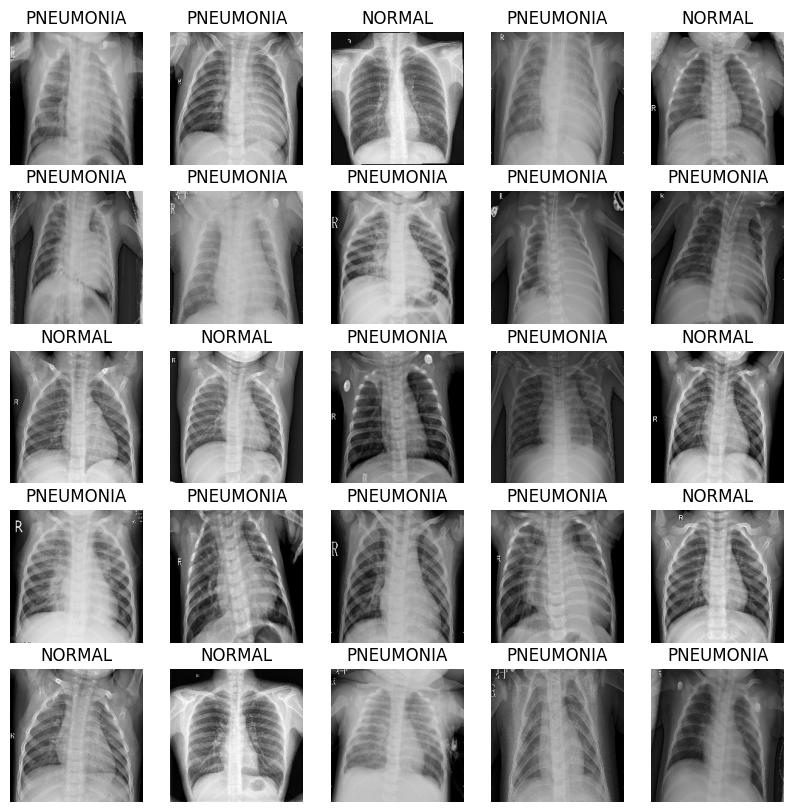

In [62]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [42]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block
    

In [43]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [44]:
IMAGE_SIZE

[180, 180]

In [45]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

In [47]:
initial_bias_log = np.log([COUNT_PNEUMONIA/COUNT_NORMAL])
initial_bias = COUNT_PNEUMONIA/COUNT_NORMAL
initial_bias_log, initial_bias

(array([1.027545]), 2.7941976427923843)

In [48]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.90
Weight for class 1: 0.68


We saw earlier in this notebook that the data was imbalanced, with more images classified as pneumonia than normal. We correct for that above.

The weight for class 0 (Normal) is a lot higher than the weight for class 1 (Pneumonia). Because there are less normal images, each normal image will be weighted more to balance the data as the CNN works best when the training data is balanced.

Since there are only two possible labels for the image, we will be using the binary_crossentropy loss. When we fit the model, identify the class weights. Because we are using a TPU, training will be relatively quick.

For our metrics, we want to include precision and recall as they will provide use with a more informed picture of how good our model is. Accuracy tells us what fractions are the labels are correct. Since our data is not balanced, accuracy might give a skewed sense of a good model (i.e. a model that always predicts PNEUMONIA will be 74% accurate but is not a good model).

Precision is the number of true positives (TP) over the sum of TP and false positives (FP). It shows what fraction of labeled positives are actually correct.

Recall is the number of TP over the sum of TP and false negatves (FN). It shows what fraction of actual positives are correct.

In [49]:
with strategy.scope():
    model = build_model()
    
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

I0000 00:00:1717107564.539360      13 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [63]:
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_ds,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    class_weight=class_weight,
)

Epoch 1/25


2024-05-30 22:26:49.834667: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1717108011.911564     816 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(5d256fa0b1842bc3:0:0), session_name()


 2/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4844 - loss: 0.9982 - precision: 0.7536 - recall: 0.5086  

I0000 00:00:1717108020.477388     816 tpu_compile_op_common.cc:245] Compilation of 5d256fa0b1842bc3:0:0 with session name  took 8.565762462s and succeeded
I0000 00:00:1717108020.497155     816 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(5d256fa0b1842bc3:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_7946509242422151709", property.function_library_fingerprint = 13835988209570650977, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,180,180,3,;16,;16,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717108020.497216     816 tpu_compilation_cache_interface.cc:541] After adding entry for k

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5516 - loss: 0.8432 - precision: 0.7891 - recall: 0.5354

I0000 00:00:1717108025.275523     831 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(ae3829594a1e5179:0:0), session_name()
I0000 00:00:1717108027.795854     831 tpu_compile_op_common.cc:245] Compilation of ae3829594a1e5179:0:0 with session name  took 2.520257832s and succeeded
I0000 00:00:1717108027.800454     831 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(ae3829594a1e5179:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_11900140070375012020", property.function_library_fingerprint = 7109199841541325591, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "16,180,180,3,;16,;", property.guaranteed_constants_size = 0, embed

32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 242ms/step - accuracy: 0.5522 - loss: 0.8418 - precision: 0.7898 - recall: 0.5358 - val_accuracy: 0.3203 - val_loss: 0.7240 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6935 - loss: 0.5655 - precision: 0.9207 - recall: 0.6412 - val_accuracy: 0.2109 - val_loss: 0.7155 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7759 - loss: 0.4461 - precision: 0.9519 - recall: 0.7345 - val_accuracy: 0.7109 - val_loss: 0.6426 - val_precision: 0.7109 - val_recall: 1.0000
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8186 - loss: 0.3720 - precision: 0.9589 - recall: 0.7875 - val_accuracy: 0.8047 - val_loss: 0.5168 - val_precision: 0.8047 - val_recall: 1.0000
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8425 - loss: 0.3340 - precision: 0.9590 - recall: 0.8240 - val_accuracy: 0.7422 - val_loss: 

In [96]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("xray_model.keras", save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


We want to finetune our learning rate. Too high of a learning rate will cause the model to diverge. Too small of a learning rate will cause the model to be too slow. We implement the exponential learning rate scheduling method below.

In [97]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch/s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [82]:
with tf.device('/CPU:0'):
    checkpoint = tf.keras.callbacks.ModelCheckpoint("xray_model.keras", save_best_only=True)
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [85]:
with tf.device('/CPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=100,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[checkpoint, early_stopping, lr_scheduler]
    )

ValueError: Device /job:localhost/replica:0/task:0/device:CPU:0 is not found

In [89]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=100,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[checkpoint, early_stopping, lr_scheduler]
    )

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


RuntimeError: Mixing different tf.distribute.Strategy objects: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7fc8f018e740> is not <tensorflow.python.distribute.tpu_strategy.TPUStrategy object at 0x7fd5840a2aa0>

In [90]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

AttributeError: module 'keras._tf_keras.keras.backend' has no attribute 'set_session'

In [91]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.16.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16709770544408415126
xla_global_id: -1
, name: "/device:TPU_SYSTEM:0"
device_type: "TPU_SYSTEM"
memory_limit: 17179869184
locality {
}
incarnation: 18185037109203133108
physical_device_desc: "device: TPU_SYSTEM device"
xla_global_id: -1
, name: "/device:TPU:0"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 4727772799133333430
physical_device_desc: "device: TPU device"
xla_global_id: -1
, name: "/device:TPU:1"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 11526853274970966991
physical_device_desc: "device: TPU device"
xla_global_id: -1
, name: "/device:TPU:2"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 6951572036189871891
physical_device_desc: "device: TPU device"
xla_global_id: -1
, name: "/device:TPU:3"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 4861819937766885882
physical_device_desc

In [98]:
with strategy.scope(): # Train the model
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=100,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[checkpoint, early_stopping, lr_scheduler]
    )


RuntimeError: Mixing different tf.distribute.Strategy objects: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7fc8f018e740> is not <tensorflow.python.distribute.tpu_strategy.TPUStrategy object at 0x7fd5840a2aa0>

In [101]:
with strategy.scope():
    # Define your callbacks
    checkpoint = tf.keras.callbacks.ModelCheckpoint("xray_model.keras", save_best_only=True)
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

    def exponential_decay(lr0, s):
        def exponential_decay_fn(epoch):
            return lr0 * 0.1 ** (epoch / s)
        return exponential_decay_fn

    exponential_decay_fn = exponential_decay(0.01, 20)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

    # Train the model
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=100,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks=[checkpoint, early_stopping, lr_scheduler]
    )


TypeError: true_fn and false_fn arguments to tf.cond must have the same number, type, and overall structure of return values.

true_fn output: Tensor("cond/Identity:0", shape=(None,), dtype=int64)
false_fn output: Tensor("cond/Identity:0", shape=(None,), dtype=int32)

Error details:
Tensor("cond/Identity:0", shape=(None,), dtype=int64) and Tensor("cond/Identity:0", shape=(None,), dtype=int32) have different types

Let's plot the model accuracy and loss for the training and the validating set. These plots show the accuracy and loss values for the second round of training. Since we initially trained the model with 30 epochs, these would be epochs 31-45. Note that no random seed is specified for this notebook. For your notebook, there might be slight variance.

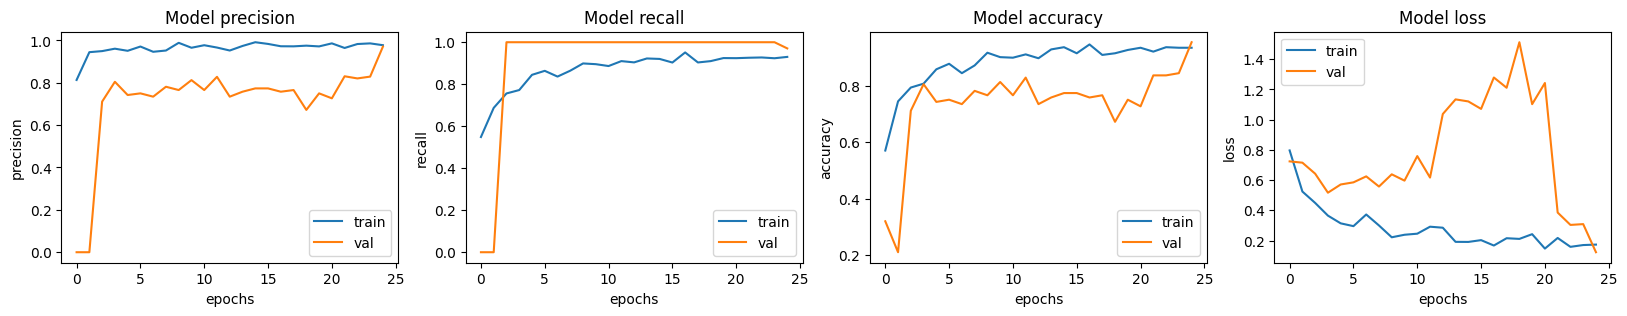

In [103]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [104]:
loss, acc, prec, rec = model.evaluate(test_ds)

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.7682 - loss: 0.6054 - precision: 0.7406 - recall: 0.9791

I0000 00:00:1717110831.296986     817 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(4f2d9ef2a789f36c:0:0), session_name()


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 882ms/step - accuracy: 0.7655 - loss: 0.6104 - precision: 0.7347 - recall: 0.9844


I0000 00:00:1717110834.077779     817 tpu_compile_op_common.cc:245] Compilation of 4f2d9ef2a789f36c:0:0 with session name  took 2.780727362s and succeeded
I0000 00:00:1717110834.082782     817 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(4f2d9ef2a789f36c:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_11900140070375012020", property.function_library_fingerprint = 7109199841541325591, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "14,180,180,3,;14,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1717110834.082810     817 tpu_compilation_cache_interface.cc:541] After adding entry for key 4